# Programming in Python


## 1. Getting to know Python

### Different ways to interact with Python
 1. Using the interpreter (for instance `ipython`)
 2. Using the `jupyter notebook`
 3. Writing and executing programs (`python myProgram.py`)

### Python language elements

 #### Python as a calculator 
   * operations 
   * math functions

In [3]:
import math


#### numbers 
 * integers
 * floats

#### working with strings 
 * single line
 * extending obver several lines
 * converting numbers to string

#### packing things together -- lists and tuples
 * length
 * indexing 
 * slicing

#### accessing values by keys -- dictionaries
 * example

 #### storing data in **variables**
  * setting and retrieving 

 #### printing
  * default print
  * formatted print

 #### **Identation** is part of the language!
   * loops
   * conditionals
   * scoping

#### functions

#### comments

### Common pitfalls
 * watch out for indentation
 * comparing floats may yield unintented consequences
 * integer division (//) vs division (/)
 * in place vs function that return new objects

## 2. Python with batteries charged

### Numpy for fast array operations (Matlab and IDL users pay attention)

$$\frac{\partial f}{\partial t} + u \frac{\partial f}{\partial x} = 0$$
$$f_i^{t + \Delta t} = (1 - C) f_i^t + C f_{i-1}^t$$ with $$C \equiv \frac{u \Delta t}{\Delta x}$$

Up-wind implementation:

`newf[i] = (1 - c)*f[i] + c*f[i - 1]` for $i \in 1...n-1$

`newf[0] = (1 - c)*f[0] + c*f[-1]` (assuming periodic boundary conditions)

In [4]:
import numpy

# code to advance function f starting from initial 
# condition f0
#
def advance(f0, c, nt=10):
    """
    Advance the function 
    f0  initial condition
    c   Courant coefficient
    nt  number of time steps
    """
    pass


n = 1000
f0 = numpy.zeros([n], numpy.float64) # initial condition
f0[0:n//4] = 1.
advance(f0, 0.99, nt=500)


### Pandas for data analysis (R users pay attention)

What the relation between prosperity and latitude?
 * Look at GDP data for a number of cities around the world
 * Get the population and the latitude data for these cities
 * Compute the GDP per capita for each city
 * plot GDP per capita data against the latitude of each city

In [5]:
import pandas 
gdp = pandas.read_csv('http://bit.ly/citiesGDP')

In [6]:
# show the first few rows
gdp.head()

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460


In [7]:
# renaming columns

In [8]:
# select the cities for which the GDP > $1000bn
gdp.iloc[2,2]

'USA'

In [9]:
geo = pandas.read_csv('http://bit.ly/world_cities')

In [10]:
geo.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [11]:
geo.drop(['city_ascii','lng','iso2','iso3'],axis=1,inplace=True)

In [12]:
# list the cities in New Zealand with more than 100000 inhabitants
mask = geo.loc[:,'country']=='New Zealand'
df=geo.loc[mask,['city','pop','lat','country']]

In [13]:
# sort the NZ cities by population
df.sort_values('pop',ascending=False).head()

,city,pop,lat,country
4294,Auckland,759510.0,-36.850013,New Zealand
4288,Manukau,336141.5,-36.999978,New Zealand
4292,Wellington,296300.0,-41.299974,New Zealand
4293,Christchurch,295351.5,-43.535031,New Zealand
4267,Takapuna,184815.5,-36.791257,New Zealand


In [14]:
# get all the cities named "London"
geo.loc[geo.loc[:,'city']=="London",['city','country']]

,city,country
1322,London,Canada
6302,London,United Kingdom
6442,London,United States of America


In [15]:
# get all the cities named "Portland" 
geo.loc[geo.loc[:,'city']=="Portland",['city','country','province']]

,city,country,province
574,Portland,Australia,Victoria
6946,Portland,United States of America,Maine
7022,Portland,United States of America,Oregon


In [16]:
# remove some rows in the datasets

In [17]:
# check that Portland appears only once

In [18]:
# combine the two tables
# beware that some cities appear multiple times across countries
gdp_per_capita = []
lats = []
city_names = []
countries = []

# iterate over the rows of gdp
for row in gdp.iterrows():
    pass

In [19]:
# create a new data frame with data combined from two tables

In [20]:
#merge the data frames on city and country
df=pandas.merge(gdp,geo, left_on=['City/Urban area', 'Country'],right_on=['city','country'])
df.head()

,Rank,City/Urban area,Country,GDP in US$bn 2005,city,lat,pop,country,province
0,1,Tokyo,Japan,1191,Tokyo,35.685017,22006299.5,Japan,Tokyo
1,5,Paris,France,460,Paris,48.866693,4957588.5,France,Île-de-France
2,8,Mexico City,Mexico,315,Mexico City,19.442442,14919501.0,Mexico,Distrito Federal
3,13,Buenos Aires,Argentina,245,Buenos Aires,-34.602502,11862073.0,Argentina,Ciudad de Buenos Aires
4,19,Sao Paulo,Brazil,225,Sao Paulo,-23.558680,14433147.5,Brazil,São Paulo


In [21]:
#Calculate GDP per capita
df['GDPperCap']=df['GDP in US$bn 2005']*1000000000/df['pop']

In [22]:
#Show cities with GDP per capita > 50k
df[df['GDPperCap'] > 50000]

,Rank,City/Urban area,Country,GDP in US$bn 2005,city,lat,pop,country,province,GDPperCap
0,1,Tokyo,Japan,1191,Tokyo,35.685017,22006299.5,Japan,Tokyo,54120.866618
1,5,Paris,France,460,Paris,48.866693,4957588.5,France,Île-de-France,92787.047574
7,23,Madrid,Spain,188,Madrid,40.400026,2808718.5,Spain,Comunidad de Madrid,66934.440030
13,33,Melbourne,Australia,135,Melbourne,-37.820031,2131812.5,Australia,Victoria,63326.394793
17,38,Rome,Italy,123,Rome,41.895956,1687226.0,Italy,Lazio,72900.725807
18,40,Milan,Italy,115,Milan,45.469975,2125830.5,Italy,Lombardia,54096.504872
31,64,Vancouver,Canada,79,Vancouver,49.273417,1458415.0,Canada,British Columbia,54168.395141
34,67,Stockholm,Sweden,76,Stockholm,59.350760,1258654.5,Sweden,Stockholm,60381.939603
44,79,Lyon,France,56,Lyon,45.770009,947658.5,France,Rhône-Alpes,59093.017158
53,90,Helsinki,Finland,43,Helsinki,60.175563,836728.5,Finland,Southern Finland,51390.624318


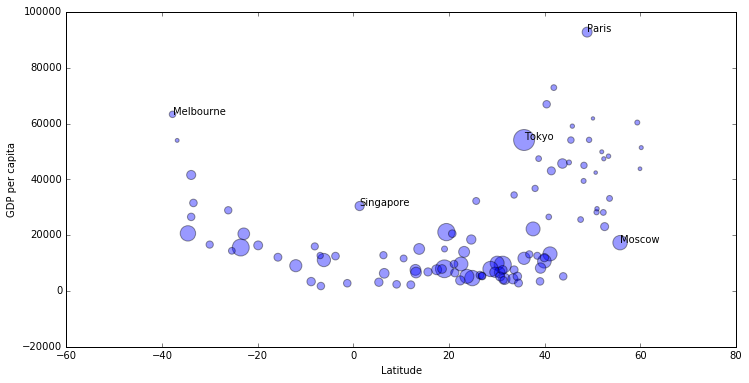

In [60]:
# create scatter plot 
% matplotlib inline
from matplotlib import pylab, pyplot
# nicer plot size
pylab.rcParams['figure.figsize'] = (12, 6)
fig=pyplot.figure()
p=ax = fig.add_subplot(111)
pyplot.scatter(df['lat'],df['GDPperCap'],s=df['pop']/50000,alpha=0.4)
p.annotate('Paris',xy=(df['lat'][1],df['GDPperCap'][1]))
p.annotate('Melbourne',xy=(df['lat'][13],df['GDPperCap'][13]))
p.annotate('Tokyo',xy=(df['lat'][0],df['GDPperCap'][0]))
p.annotate('Singapore',xy=(df['lat'][15],df['GDPperCap'][15]))
p.annotate('Moscow',xy=(df['lat'][8],df['GDPperCap'][8]))
p.set_xlabel('Latitude')
p.set_ylabel('GDP per capita')
pyplot.show()

